In [1]:
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import cv2
import pickle as pkl
import numpy as np
from tqdm.notebook import tqdm
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.callbacks import LearningRateScheduler
from efficientnet.keras import EfficientNetB0
from efficientnet.keras import EfficientNetB1
from efficientnet.keras import EfficientNetB2
from keras.applications.mobilenet import MobileNet
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [18]:
with open('X_ver2.pickle', 'rb') as f:
    X = pkl.load(f)
    
with open('Y_ver2.pickle', 'rb') as f:
    Y = pkl.load(f)

In [19]:
index = np.array([i for i in range(X.shape[0])])

In [20]:
X_train, X_test, index_train, index_test = train_test_split(X, index, test_size=0.2, random_state=42)

In [21]:
y_train = np.zeros((X_train.shape[0], 136), dtype = np.uint8)
for i in range(X_train.shape[0]):
    y_train[i, :] = Y[index_train[i], :]

In [22]:
y_test = np.zeros((X_test.shape[0], 136), dtype = np.uint8)
for i in range(X_test.shape[0]):
    y_test[i, :] = Y[index_test[i], :]

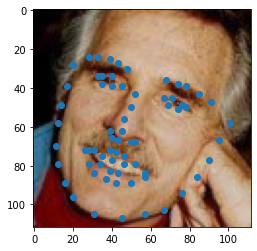

In [133]:
per = 34
plt.imshow(X_test[per])
kp2 = y_test[per, :].reshape(68, 2)
plt.scatter(kp2[:, 0], kp2[:, 1])
plt.savefig('example1.jpg')
plt.show()

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [30]:
mobileNet_v2 = MobileNetV2(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_ = mobileNet_v2.layers[-2].output
out_ = Dense(68*2, activation ='linear')(out_)
model = Model(inputs = mobileNet_v2.input, outputs = out_)
callback = LearningRateScheduler(lambda epoch : 1e-3 if epoch < 30 else 1e-4)
model.compile(optimizer=Adam(), loss = 'mse')


In [31]:
with open('MobileNetV2', 'rb') as f:
    model.load_weights(f)

In [32]:
y_test_MobileNetV2 = np.array(y_test.shape)

In [33]:
y_test_MobileNetV2 = model.predict(X_test)

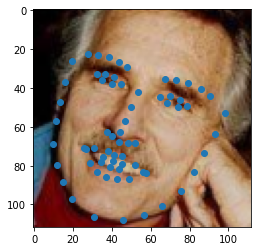

In [134]:
per = 34
plt.imshow(X_test[per])
kp2 = y_test_MobileNetV2[per, :].reshape(68, 2)
plt.scatter(kp2[:, 0], kp2[:, 1])
plt.savefig('example1_mymodel.jpg')
plt.show()

In [35]:
mobileNet = MobileNet(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_1 = mobileNet.layers[-2].output
out_1 = Dense(68*2, activation ='linear')(out_1)
model = Model(inputs = mobileNet.input, outputs = out_1)
model.compile(optimizer=Adam(), loss = 'mse')

In [37]:
with open('MobileNet', 'rb') as f:
    model.load_weights(f)

In [38]:
y_test_MobileNet = model.predict(X_test)

In [39]:
efficient_net = EfficientNetB0(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_2 = efficient_net.layers[-2].output
out_2 = Dense(68*2, activation ='linear')(out_2)
model = Model(inputs = efficient_net.input, outputs = out_2)
model.compile(optimizer=Adam(), loss = 'mse')

In [40]:
with open('EfficientNetB0', 'rb') as f:
    model.load_weights(f)

In [41]:
y_test_EfficientNetB0 = model.predict(X_test)

In [42]:
efficient_net_b1 = EfficientNetB1(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_3 = efficient_net_b1.layers[-2].output
out_3 = Dense(68*2, activation ='linear')(out_3)
model = Model(inputs = efficient_net_b1.input, outputs = out_3)
model.compile(optimizer=Adam(), loss = 'mse')

In [43]:
with open('EfficientNetB1', 'rb') as f:
    model.load_weights(f)

In [44]:
y_test_EfficientNetB1 = model.predict(X_test)

In [45]:
efficient_net_b2 = EfficientNetB2(input_shape=(112, 112, 3), classes=68*2, weights=None)
out_4 = efficient_net_b2.layers[-2].output
out_4 = Dense(68*2, activation ='linear')(out_4)
model = Model(inputs = efficient_net_b2.input, outputs = out_4)
model.compile(optimizer=Adam(), loss = 'mse')

In [46]:
with open('EfficientNetB2', 'rb') as f:
    model.load_weights(f)

In [47]:
y_test_EfficientNetB2 = model.predict(X_test)

In [59]:
mse_MobileNetV2 = np.sum(np.square(y_test_MobileNetV2 - y_test)) / (y_test.shape[0] * y_test.shape[1])
mse_MobileNet = np.sum(np.square(y_test_MobileNet - y_test)) / (y_test.shape[0] * y_test.shape[1])
mse_EfficientNetB0 = np.sum(np.square(y_test_EfficientNetB0 - y_test)) / (y_test.shape[0] * y_test.shape[1])
mse_EfficientNetB1 = np.sum(np.square(y_test_EfficientNetB1 - y_test)) / (y_test.shape[0] * y_test.shape[1])
mse_EfficientNetB2 = np.sum(np.square(y_test_EfficientNetB2 - y_test)) / (y_test.shape[0] * y_test.shape[1])

In [60]:
print('MobileNetV2 loss', mse_MobileNetV2)
print('MobileNet loss', mse_MobileNet)
print('EfficientNetB0 loss', mse_EfficientNetB0)
print('EfficientNetB1 loss', mse_EfficientNetB1)
print('EfficientNetB2 loss', mse_EfficientNetB2)

MobileNetV2 loss 2.056493882882398
MobileNet loss 2.1889139152607213
EfficientNetB0 loss 2.154857221195147
EfficientNetB1 loss 2.1365667777459394
EfficientNetB2 loss 2.1873086355285913


In [75]:
mse_MobileNetV2_graph = np.sum(np.square(y_test_MobileNetV2 - y_test), axis = 1) / y_test.shape[1]
mse_MobileNet_graph = np.sum(np.square(y_test_MobileNet - y_test), axis = 1) / y_test.shape[1]
mse_EfficientNetB0_graph = np.sum(np.square(y_test_EfficientNetB0 - y_test), axis = 1) / y_test.shape[1]
mse_EfficientNetB1_graph = np.sum(np.square(y_test_EfficientNetB1 - y_test), axis = 1) / y_test.shape[1]
mse_EfficientNetB2_graph = np.sum(np.square(y_test_EfficientNetB2 - y_test), axis = 1) / y_test.shape[1]

In [76]:
import seaborn as sns

Text(0.5, 1.0, 'MobileNetV2 loss distribution')

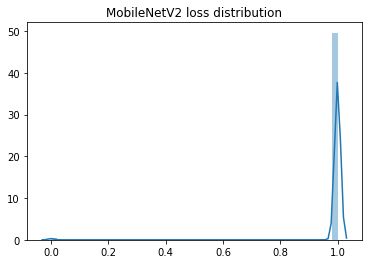

In [79]:
sns.distplot(mse_MobileNetV2_graph < 10).set_title('MobileNetV2 loss distribution')

Text(0.5, 1.0, 'MobileNet loss distribution')

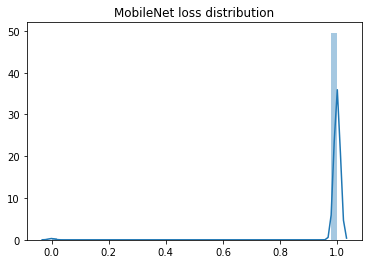

In [80]:
sns.distplot(mse_MobileNet_graph < 10).set_title('MobileNet loss distribution')

Text(0.5, 1.0, 'EfficientNetB0 loss distribution')

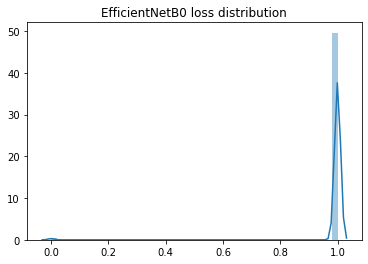

In [81]:
sns.distplot(mse_EfficientNetB0_graph < 10).set_title('EfficientNetB0 loss distribution')

Text(0.5, 1.0, 'EfficientNetB1 loss distribution')

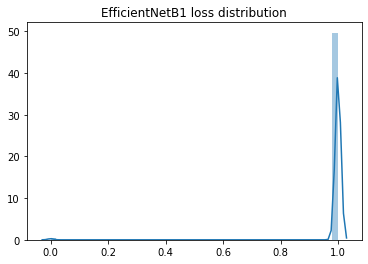

In [82]:
sns.distplot(mse_EfficientNetB1_graph < 10).set_title('EfficientNetB1 loss distribution')

Text(0.5, 1.0, 'EfficientNetB2 loss distribution')

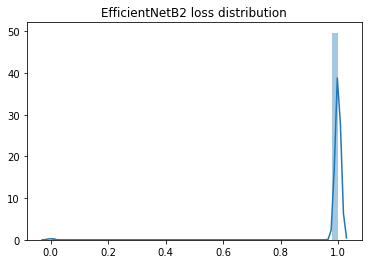

In [83]:
sns.distplot(mse_EfficientNetB2_graph < 10).set_title('EfficientNetB2 loss distribution')

In [84]:
np.argsort(mse_MobileNetV2_graph)[-1]

3630

In [101]:
mse_MobileNetV2_graph[3630]

6261.0884

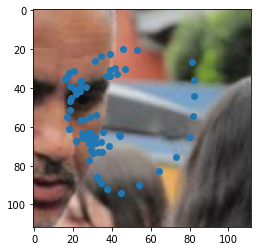

In [135]:
per = 3630
plt.imshow(X_test[per])
kp2 = y_test_MobileNetV2[per, :].reshape(68, 2)
plt.scatter(kp2[:, 0], kp2[:, 1])
plt.savefig('example2_bad_mymodel.jpg')
plt.show()

In [87]:
with open('X_origin.pickle', 'rb') as f:
    X_origin = pkl.load(f)

In [136]:
file_name = 'img_celeba/' + X_origin[index_test[3630]][0]
kp = X_origin[index_test[3630]][1]

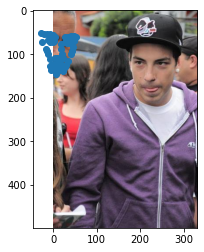

In [137]:
plt.imshow(io.imread(file_name))
plt.scatter(kp[:, 0], kp[:, 1])
plt.savefig('example2_bad_origin.jpg')
plt.show()

In [99]:
np.argsort(mse_MobileNetV2_graph)[-2]

2476

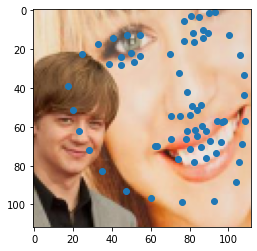

In [110]:
per = 2476
plt.imshow(X_test[per])
kp2 = y_test_MobileNetV2[per, :].reshape(68, 2)
plt.scatter(kp2[:, 0], kp2[:, 1])
plt.show()

In [102]:
mse_MobileNetV2_graph[per]

4224.4634

In [106]:
file_name = 'img_celeba/' + X_origin[index_test[per]][0]
kp = X_origin[index_test[per]][1]

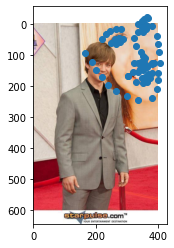

In [107]:
plt.imshow(io.imread(file_name))
plt.scatter(kp[:, 0], kp[:, 1])
plt.show()

In [117]:
index_test[per]

133408

In [113]:
with open('HAS_OUTOFSIZE_KEYPOINS.pickle', 'rb') as f:
    HAS_OUTOFSIZE_KEYPOINS = pkl.load(f)

In [120]:
bad_index = set()
for p in HAS_OUTOFSIZE_KEYPOINS:
    bad_index.add(p[0])

In [123]:
def calc_mse_and_max_nonout(arr):
    mse = 0.0
    cnt = 0
    mx = 0.0
    ind_mx = 0.0
    for i in range(arr.shape[0]):
        if index_test[i] not in bad_index:
            mse += arr[i]
            cnt += 1
            if arr[i] > mx:
                mx = arr[i]
                ind_mx = i
    return mse / cnt, mx, ind_mx

In [124]:
calc_mse_and_max_nonout(mse_MobileNetV2_graph)

(1.6067367007477575, 2209.334, 16345)

In [125]:
calc_mse_and_max_nonout(mse_MobileNet_graph)

(1.7318485348436101, 2162.4082, 16345)

In [127]:
calc_mse_and_max_nonout(mse_EfficientNetB0_graph)

(1.6883886635782752, 2043.3427, 16345)

In [128]:
calc_mse_and_max_nonout(mse_EfficientNetB1_graph)

(1.656768401551813, 2033.3842, 16345)

In [129]:
calc_mse_and_max_nonout(mse_EfficientNetB2_graph)

(1.727235093745986, 2069.984, 16345)

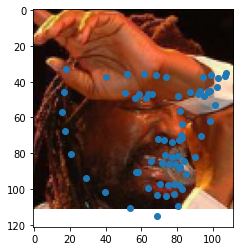

In [138]:
per = 16345
plt.imshow(X_test[per])
kp2 = y_test_MobileNetV2[per, :].reshape(68, 2)
plt.scatter(kp2[:, 0], kp2[:, 1])
plt.savefig('example3_good_mymodel.jpg')
plt.show()

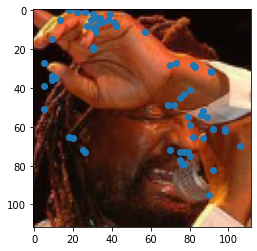

In [139]:
per = 16345
plt.imshow(X_test[per])
kp2 = y_test[per, :].reshape(68, 2)
plt.scatter(kp2[:, 0], kp2[:, 1])
plt.savefig('example3_good_origin.jpg')
plt.show()

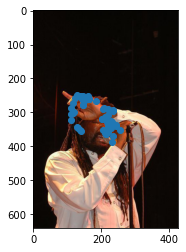

In [132]:
file_name = 'img_celeba/' + X_origin[index_test[per]][0]
kp = X_origin[index_test[per]][1]
plt.imshow(io.imread(file_name))
plt.scatter(kp[:, 0], kp[:, 1])
plt.show()